In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)


In [4]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

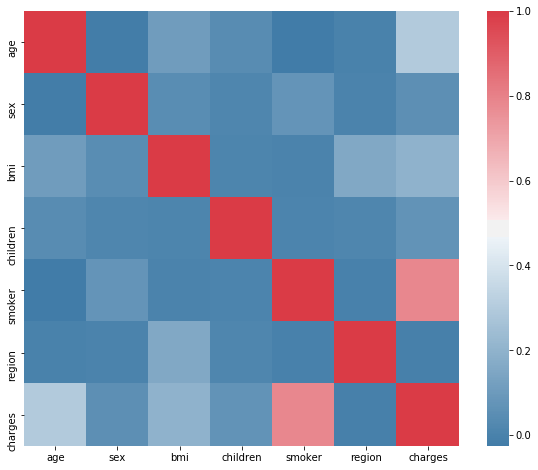

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), 
            cmap = sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax = ax)

Text(0.5,1,'Distribution of Charges for Non-Smokers')

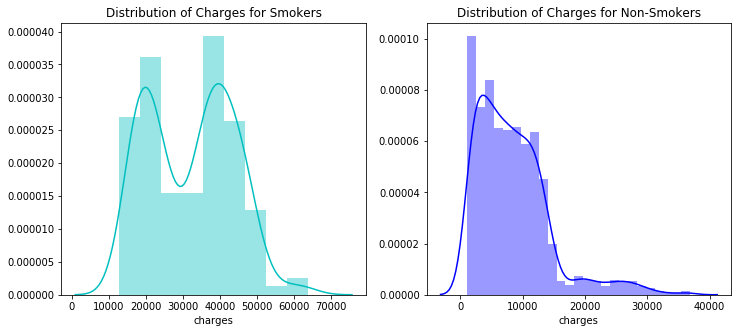

In [6]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]['charges'], color = 'c', ax=ax)
ax.set_title('Distribution of Charges for Smokers')

ax = fig.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'], color = 'b', ax = ax)
ax.set_title('Distribution of Charges for Non-Smokers')

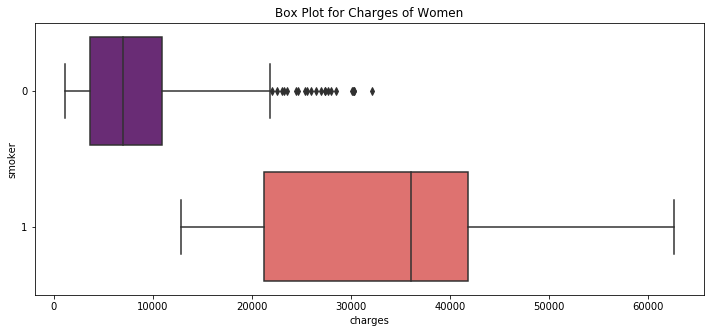

In [7]:
plt.figure(figsize=(12,5))
plt.title("Box Plot for Charges of Women")
sns.boxplot(y='smoker', x='charges', data = data[(data.sex == 1)], 
           orient='h', palette = 'magma')

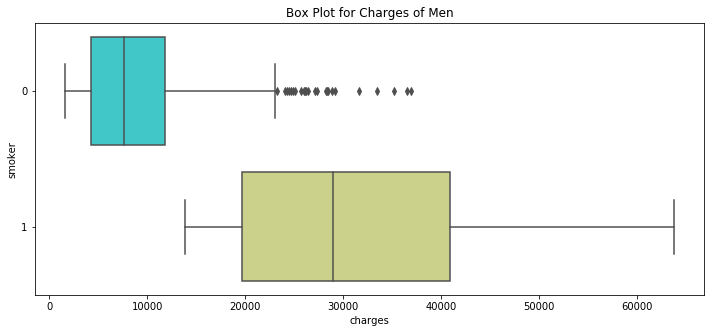

In [8]:
plt.figure(figsize=(12,5))
plt.title("Box Plot for Charges of Men")
sns.boxplot(y='smoker', x='charges', data = data[(data.sex == 0)], 
           orient='h', palette = 'rainbow')

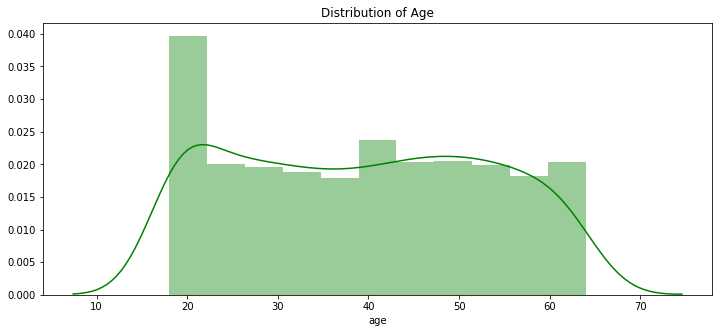

In [9]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Age')
ax = sns.distplot(data['age'], color = 'g')

In [10]:
# Predicting cost of treatment

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [11]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test, y_test))

0.7962732059725786


In [13]:
X = data.drop(['charges', 'region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state = 0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test, Y_test))

0.8846283666147681


In [14]:
forest = RandomForestRegressor(n_estimators = 100, 
                              criterion = 'mse',
                              random_state = 1,
                               n_jobs = -1)

forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train, forest_train_pred),
mean_squared_error(y_test, forest_test_pred)))

print('R2 train data: %.3f, R@ test data: %.3f' % (
r2_score(y_train, forest_train_pred),
r2_score(y_test, forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R@ test data: 0.873


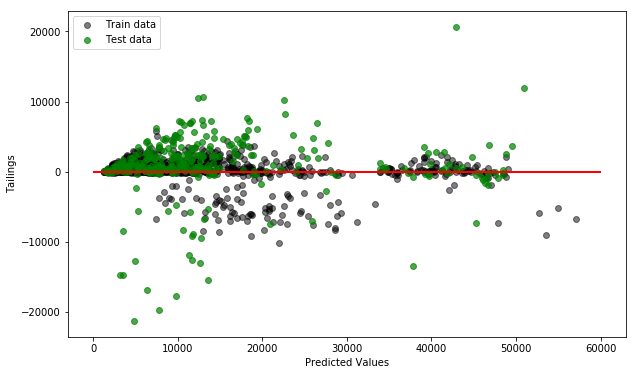

In [17]:
plt.figure(figsize=(10, 6))

plt.scatter(forest_train_pred, forest_train_pred - y_train,
           c = 'black', marker = 'o', s = 35, alpha = 0.5,
           label = 'Train data')

plt.scatter(forest_test_pred, forest_test_pred - y_test,
           c = 'green', marker = 'o', s = 35, alpha = 0.7,
           label = 'Test data')

plt.xlabel('Predicted Values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()